# Напоминание из теории

Представим, что имеем $2$ класса. Будем решать задачу предсказания вероятности отнесения объекта к какому-то классу:

$$
\mathbb{P}(C_1|x) = 1-\mathbb{P}(C_2|x).
$$

Применяя формулу Байеса, получим, что такая вероятность

$$
\mathbb{P}(C_1|x) = \frac{\mathbb{P}(x|C_1)\mathbb{P}(C_1)}{\mathbb{P}(x)},
$$

где
* $\mathbb{P}(x|C_1)$ — правдоподобие
* $\mathbb{P}(C_1)$ — априорная вероятность для класса $C_1$. Обычно оценивается из соотношения количества объектов в классах $C_1$ и $C_2$.

Будем относить объект $x$ к классу $C_1$, если

$$
\mathbb{P}(C_1|x) > \mathbb{P}(C_2|x).
$$

Или, иными словами, можем построить разделяющую поверхность и определять принадлежность нового объекта $x$ к классу относительно нее.

Понятно, что в таком случае разделяющая поверхность будет задаваться уравнением

$$
\mathbb{P}(C_1|x) = \mathbb{P}(C_2|x)
$$

или, избавляясь от знаменателей,

$$
\mathbb{P}(x|C_1)\mathbb{P}(C_1) = \mathbb{P}(x|C_2)\mathbb{P}(C_2).
$$

Осталось определиться с $\mathbb{P}(x|C_1)$ и $\mathbb{P}(x|C_2)$. Будем считать, что объекты внутри классов распределены нормально (гауссианы). То есть

$$
\mathbb{P}(x|C_i) = \mathbb{N}(x|\mu_i, \Sigma_i).
$$

Напомним, что в случае многомерного гауссиана плотность вероятности для вектора $x$ размерности $d$ имеет вид:

$$
\mathbb{N}(x|\mu_i, \Sigma_i) = \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} \exp\left(-\frac{1}{2}(x-\mu_i)^T \Sigma_i^{-1} (x-\mu_i)\right)
$$

Работать с произведением таких выражений и экспонентами неудобно. Поэтому стандартный прием — это перейти от равенства самих вероятностей к равенству их натуральных логарифмов. Поскольку логарифм — монотонная функция, решение не изменится.

Логарифмируем уравнение разделяющей поверхности:

$$
\ln \left( \mathbb{P}(x|C_1)\mathbb{P}(C_1) \right) = \ln \left( \mathbb{P}(x|C_2)\mathbb{P}(C_2) \right)
$$

или

$$
\ln \mathbb{P}(x|C_1) + \ln \mathbb{P}(C_1) = \ln \mathbb{P}(x|C_2) + \ln \mathbb{P}(C_2)
$$



$$
-\frac{1}{2}(x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1) - \frac{1}{2}\ln|\Sigma_1| + \ln \mathbb{P}(C_1)
$$

$$
= -\frac{1}{2}(x-\mu_2)^T \Sigma_2^{-1} (x-\mu_2) - \frac{1}{2}\ln|\Sigma_2| + \ln \mathbb{P}(C_2)
$$



Распишем логарифм правдоподобия:

$$
\ln \mathbb{P}(x|C_i) = \ln \mathbb{N}(x|\mu_i, \Sigma_i) = -\frac{1}{2}(x-\mu_i)^T \Sigma_i^{-1} (x-\mu_i) - \frac{1}{2}\ln|\Sigma_i| - \frac{d}{2}\ln(2\pi)
$$

Подставляя это в наше уравнение и упрощая, получаем следующий вид разделяющей поверхности:

$$
\boxed{
\ln \mathbb{P}(C_1) - \frac{1}{2}\ln |\Sigma_1| - \frac{1}{2}(x-\mu_1)^{T}\Sigma_1^{-1}(x-\mu_1) = \ln \mathbb{P}(C_2) - \frac{1}{2}\ln |\Sigma_2| - \frac{1}{2}(x-\mu_2)^{T}\Sigma_2^{-1}(x-\mu_2).
}
$$

Понятно, что разделяющая поверхность квадратичная. Для оценки параметров $\mu_i$ и $\Sigma_i$ имеет смысл использовать соответствующие выборочные характеристики (выборочное среднее и выборочная ковариационная матрица). Оценить $\mathbb{P}(C_i)$ можно долей числа элементов соответствующего класса.

# LDA

В рамках предположения, что $\Sigma_1 = \Sigma_2$ и

$$
\Sigma =  \frac{|C_1|}{|C_1| + |C_2|}\Sigma_1 + \frac{|C_2|}{|C_1| + |C_2|}\Sigma_2,
$$

где

$$
\Sigma_i = \frac{1}{|C_i|}\sum_{x\in C_i}\left(x-\mu_i\right)\left(x-\mu_i\right)^T
$$

разделяющая поверхность будет иметь вид гиперплоскости

$$
\boxed{
\left(\mu_2 - \mu_1\right)\Sigma^{-1}x + \frac{1}{2} \left(\mu_1^{T}\Sigma^{-1}\mu_1 - \mu_2^{T}\Sigma^{-1}\mu_2\right) + \ln \frac{\mathbb{P}(C_2)}{\mathbb{P}(C_1)} = 0.
}
$$

или в виде

$$
w^T x + b = 0,
$$

где

$$
w^T = \left(\mu_2 - \mu_1\right)\Sigma^{-1},
$$

$$
b = \frac{1}{2} \left(\mu_1^{T}\Sigma^{-1}\mu_1 - \mu_2^{T}\Sigma^{-1}\mu_2\right) + \ln \frac{\mathbb{P}(C_2)}{\mathbb{P}(C_1)}
$$

### Генерация данных

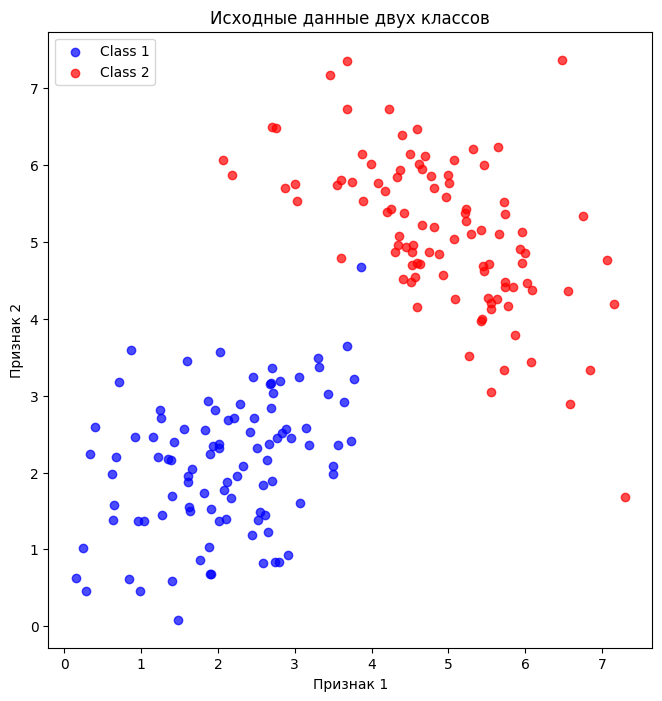

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Генерация данных
np.random.seed(42)

class_1_size = 100
class_2_size = 100

class_1 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, 0.5], [0.5, 1]], size=class_1_size)
class_2 = np.random.multivariate_normal(mean=[5, 5], cov=[[1, -0.5], [-0.5, 1]], size=class_2_size)

# Объединение данных
X = np.vstack((class_1, class_2))
y = np.hstack((np.zeros(100), np.ones(100)))

# Визуализация данных
plt.figure(figsize=(8,8))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', c='blue', alpha=0.7)
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', c='red', alpha=0.7)
plt.legend()
plt.title('Исходные данные двух классов')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.axis('scaled')
plt.show()

## Вычисление параметров модели

### Задача 1

In [ ]:
# Оценка среднего

def get_mu(class_objects):
  """
  Параметры
  ----------
  class_objects : {array-like} формы (n_samples, n_features)
      Объекты одного класса, где `n_samples` — число объектов
      и `n_features` — число признаков.

  Что возвращается
  -------
  mu : вектор из координат центроида класса
  """
  pass

mu_1 = get_mu(class_1)
mu_2 = get_mu(class_2)

assert np.isclose(mu_1, np.array([2.08307042, 2.11709274])).all() and np.isclose(mu_2, np.array([4.91067717, 5.13281048])).all()

In [ ]:
# Обращенная матрица ковариаций

def get_Sigma_inv(class_1, class_2, mu_1, mu_2):
  """
  Параметры
  ----------
  class_1 : {array-like} формы (n_samples, n_features)
      Объекты класса 1, где `n_samples` — число объектов
      и `n_features` — число признаков.
  class_2 : {array-like} формы (n_samples, n_features)
      Объекты класса 2, где `n_samples` — число объектов
      и `n_features` — число признаков.
  mu_1 : {numpy.ndarray} — вектор из координат центроида класса 1
  mu_2 : {numpy.ndarray} — вектор из координат центроида класса 2

  Что возвращается
  -------
  Sigma_inv : обращенная общая матрица ковариаций
  """
  pass

Sigma_inv = get_Sigma_inv(class_1, class_2, mu_1, mu_2)

assert np.isclose(Sigma_inv, np.array([[1.0782101, 0.18128796], [0.18128796, 1.19546925 ]])).all()


## Задача 2

In [ ]:
# Нормальный вектор гиперплоскости

def get_w(mu_1, mu_2, Sigma_inv):
  """
  Параметры
  ----------
  mu_1 : {numpy.ndarray} — вектор из координат центроида класса 1
  mu_2 : {numpy.ndarray} — вектор из координат центроида класса 2
  Sigma_inv : {numpy.ndarray} — обращенная общая матрица ковариаций

  Что возвращается
  -------
  w : нормальный вектор гиперплоскости
  """
  pass

w = get_w(mu_1, mu_2, Sigma_inv)

assert np.isclose(w, np.array([3.59546745, 4.11780887])).all()

In [ ]:
# Коэффициент смещения гиперплоскости

def get_b(mu_1, mu_2, Sigma_inv, class_1, class_2):
  """
  Параметры
  ----------
  mu_1 : {numpy.ndarray} — вектор из координат центроида класса 1
  mu_2 : {numpy.ndarray} — вектор из координат центроида класса 2
  Sigma_inv : {numpy.ndarray} — обращенная общая матрица ковариаций
  class_1 : {array-like} формы (n_samples, n_features)
      Объекты класса 1, где `n_samples` — число объектов
      и `n_features` — число признаков.
  class_2 : {array-like} формы (n_samples, n_features)
      Объекты класса 2, где `n_samples` — число объектов
      и `n_features` — число признаков.

  Что возвращается
  -------
  b : коэффициент смещения гиперплоскости
  """
  pass

b = get_b(mu_1, mu_2, Sigma_inv, class_1, class_2)

assert np.isclose(b, -27.499753803149826)

<>:15: SyntaxWarning: invalid escape sequence '\S'
<>:15: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-176628140.py:15: SyntaxWarning: invalid escape sequence '\S'
  plt.title('Разделяющая поверхность: $\Sigma_1 = \Sigma_2$')


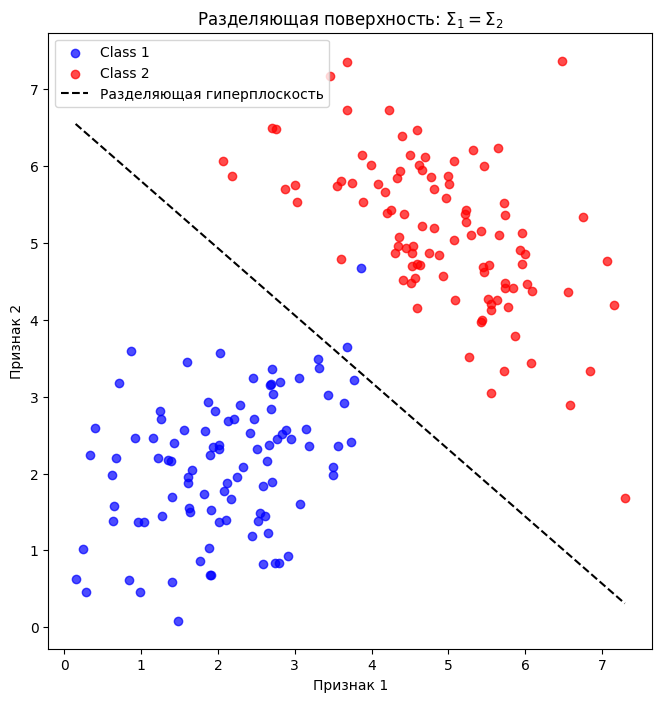

In [ ]:
# Построение разделяющей прямой
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)


# Координаты y для гиперплоскости
# y_vals =
y_vals = -(w[0] * x_vals + b) / w[1]

# Визуализация
plt.figure(figsize=(8,8))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', c='blue', alpha=0.7)
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', c='red', alpha=0.7)
plt.plot(x_vals, y_vals, label='Разделяющая гиперплоскость', color='black', linestyle = "--")
plt.legend()
plt.title('Разделяющая поверхность: $\Sigma_1 = \Sigma_2$')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.axis('scaled')
plt.show()

Если к данным добавить фиктивный столбец из единиц и в начало вектора весов добавить коэффициент, отвечающий за смещение, то классификатор будет выглядеть следующим образом

In [ ]:
X_stacked = np.hstack((np.array([1]*len(X)).reshape(-1,1), X))
W_stacked = np.hstack((b,w))

def predict(sample, W):
  result = sample @ W
  if result < 0:
    return 1
  return 2

In [ ]:
# Тестовый объект 1
sample_1 = np.array([1,3,2])
# Предсказание класса
predict(sample_1, W_stacked)

1

In [ ]:
# Тестовый объект 2
sample_2 = np.array([1,6,5])
# Предсказание класса
predict(sample_2, W_stacked)

2

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-1542173267.py:9: SyntaxWarning: invalid escape sequence '\S'
  plt.title('Разделяющая поверхность: $\Sigma_1 = \Sigma_2$')


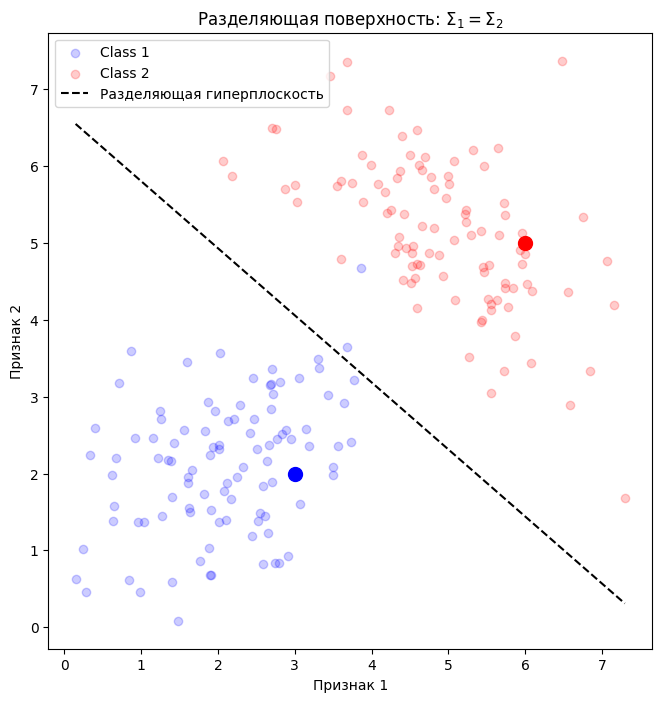

In [ ]:
# Визуализация
plt.figure(figsize=(8,8))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', c='blue', alpha=0.2)
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', c='red', alpha=0.2)
plt.scatter(sample_1[1], sample_1[2], s=100, c='blue')
plt.scatter(sample_2[1], sample_2[2], s=100, c='red')
plt.plot(x_vals, y_vals, label='Разделяющая гиперплоскость', color='black', linestyle = "--")
plt.legend()
plt.title('Разделяющая поверхность: $\Sigma_1 = \Sigma_2$')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.axis('scaled')
plt.show()

# QDA

Напомним выражение для резделяющей поверхности:

$$
\boxed{
\ln \mathbb{P}(C_1) - \frac{1}{2}\ln |\Sigma_1| - \frac{1}{2}(x-\mu_1)^{T}\Sigma_1^{-1}(x-\mu_1) = \ln \mathbb{P}(C_2) - \frac{1}{2}\ln |\Sigma_2| - \frac{1}{2}(x-\mu_2)^{T}\Sigma_2^{-1}(x-\mu_2).
}
$$

Будем называть каждую из частей уравнения **дискриминантной функцией** класса $1$ и $2$ соответственно.

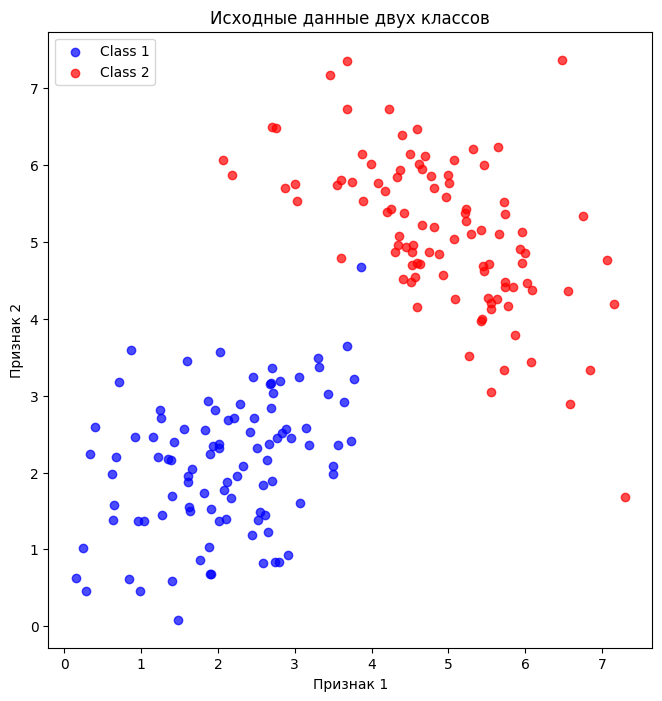

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(42)

class_1_size = 100
class_2_size = 100

class_1 = np.random.multivariate_normal(mean=[2, 2], cov=[[1, 0.5], [0.5, 1]], size=class_1_size)
class_2 = np.random.multivariate_normal(mean=[5, 5], cov=[[1, -0.5], [-0.5, 1]], size=class_2_size)

# Объединение данных
X = np.vstack((class_1, class_2))
y = np.hstack((np.zeros(100), np.ones(100)))

# Визуализация данных
plt.figure(figsize=(8,8))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', c='blue', alpha=0.7)
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', c='red', alpha=0.7)
plt.legend()
plt.title('Исходные данные двух классов')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.axis('scaled')
plt.show()

## Вычисление параметров модели

### Задача 3

In [ ]:
# Оценка среднего

def get_mu(class_objects):
  """
  Параметры
  ----------
  class_objects : {array-like} формы (n_samples, n_features)
      Объекты одного класса, где `n_samples` — число объектов
      и `n_features` — число признаков.

  Что возвращается
  -------
  mu : вектор из координат центроида класса
  """
  pass

mu_1 = get_mu(class_1)
mu_2 = get_mu(class_2)

assert np.isclose(mu_1, np.array([2.08307042, 2.11709274])).all() and np.isclose(mu_2, np.array([4.91067717, 5.13281048])).all()

In [ ]:
# Внутриклассовая матрица ковараций

def get_Sigma(class_elements, mu):
  """
  Параметры
  ----------
  class_elements : {array-like} формы (n_samples, n_features)
      Объекты данного класса, где `n_samples` — число объектов
      и `n_features` — число признаков.
  mu : {numpy.ndarray} — вектор из координат центроида данного класса

  Что возвращается
  -------
  Sigma : матрица ковариаций данного класса
  """
  pass

Sigma_1 = get_Sigma(class_1, mu_1)
Sigma_2 = get_Sigma(class_2, mu_2)

assert np.isclose(Sigma_1, np.array([[0.8150929 , 0.29751939],[0.29751939, 0.76768711]])).all() and np.isclose(Sigma_2, np.array([[ 1.08836645, -0.58617111], [-0.58617111,  0.94906895]])).all()

In [ ]:
# Оценка вероятностей классов

def get_prior(class_1, class_2):
  """
  Параметры
  ----------
  class_1 : {array-like} формы (n_samples, n_features)
      Объекты класса 1, где `n_samples` — число объектов
      и `n_features` — число признаков.
  class_2 : {array-like} формы (n_samples, n_features)
      Объекты класса 2, где `n_samples` — число объектов
      и `n_features` — число признаков.

  Что возвращается
  -------
  (prior_1, prior_2) : кортеж, состоящий из оценок вероятностей классов 1 и 2
  """
  pass

prior_1, prior_2 = get_prior(class_1, class_2)

assert np.isclose(np.array([prior_1, prior_2]), np.array([0.5, 0.5])).all()

In [ ]:
# Вычисление дискриминантной функции

def get_discriminant(x, Sigma, mu, prior):
  """
  Параметры
  ----------
  x : {array-like} вектор n_features
      Один объект данных, где `n_features` — число признаков.
  Sigma : матрица ковариаций данного класса
  mu : {numpy.ndarray} — вектор из координат центроида данного класса
  prior : оценка вероятности данного класса

  Что возвращается
  -------
  discriminant : значение дискриминантной функции для данного класса в точке x
  """
  pass

assert np.isclose(get_discriminant(X[0], Sigma_1, mu_1, prior_1), -0.6600206493124732)

<>:25: SyntaxWarning: invalid escape sequence '\S'
<>:25: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-832904455.py:25: SyntaxWarning: invalid escape sequence '\S'
  plt.title('Разделяющая поверхность: $\Sigma_1 \\neq \Sigma_2$')


  0%|          | 0/200 [00:00<?, ?it/s]

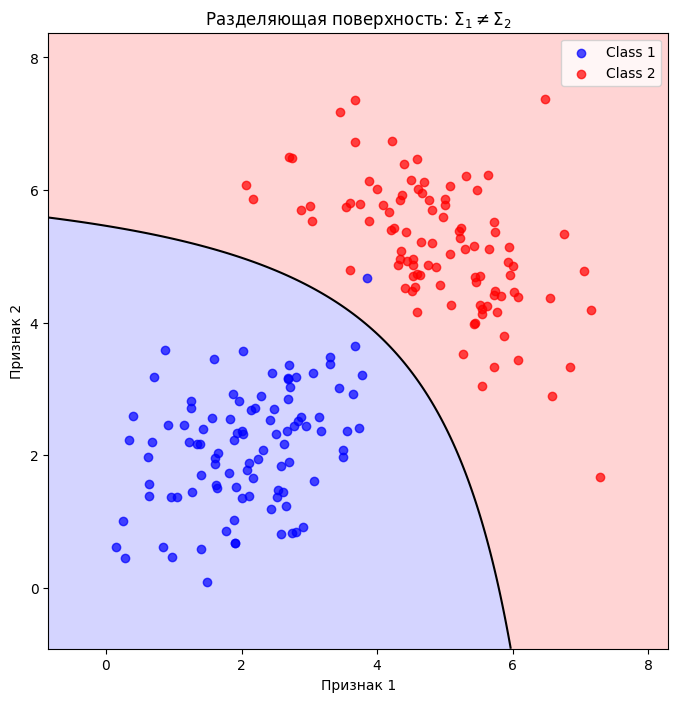

In [ ]:
from matplotlib.colors import ListedColormap
from tqdm.notebook import tqdm

# Создание сетки для визуализации разделяющей поверхности
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Вычисление квадратичного уравнения для каждой точки сетки
Z = np.zeros_like(xx)
for i in tqdm(range(xx.shape[0])):
    for j in range(xx.shape[1]):
        x = np.array([xx[i, j], yy[i, j]])

        # Разница дискриминантных функций
        Z[i, j] = get_discriminant(x, Sigma_1, mu_1, prior_1) - get_discriminant(x, Sigma_2, mu_2, prior_2)

# Построение графика разделяющей кривой
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, Z, levels=0, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], colors='black')
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', c='blue', alpha=0.7)
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', c='red', alpha=0.7)
plt.legend()
plt.title('Разделяющая поверхность: $\Sigma_1 \\neq \Sigma_2$')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()